### Demo notebook to estimate ZI models using KDE
We try to estimate the underlying distribution using Guassian Kernel. Semiparametric estimation of underlying distribution

In [1]:
import numpy as np
from scipy import stats
from graspy.simulations import er_nm, er_np
from graspy.simulations import sbm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.neighbors import KernelDensity

#### Start with ER graphs

In [2]:
n = 100
p = 0.4 ## prob of edge existing 
np.random.seed(1)
G1 = er_np(n=n, p=p)
zeros = G1[G1 ==0]


In [3]:
### Need to make the edges a Guassian distribution

def edgeDistribution(graph, mean, var): 
    for index, x in np.ndenumerate(graph):
        if x == 1:
            graph[index] = np.random.normal(mean,var) ##just use standard normal
    return(graph)


In [4]:
G1 = edgeDistribution(G1, 0,1)
G1

array([[ 0.        , -0.60735181,  0.        , ...,  0.        ,
         0.        , -0.14037099],
       [ 0.14164167,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.06152691],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.40334744],
       [-2.502177  ,  0.61644834,  0.        , ...,  0.        ,
         0.59709506,  0.        ]])

#### The first parameter to estimate is the edge non-existence

In [5]:
def probZero(graphs,shape):
    prob = ((graphs == 0).sum())/(shape**2) ##1st sum how many zeros and then to find prob, divide total number of edges
    return(prob) 

In [6]:
prob = probZero(graphs = G1, shape = G1.shape[0])
prob

0.6054

#### Working with edge existence using KDE

In [7]:
normalValues = G1[G1 != 0] ##extracting the remaining normals to fit the KDE


trainValues, testValues = np.split(normalValues, 2, axis = 0) 
testValues.shape

(1973,)

In [8]:
## 
kernel = stats.gaussian_kde(trainValues) ##first train the kernel 
print(kernel)


est = np.zeros(testValues.shape[0]) ##to store the output of the kernel func
for index, x in np.ndenumerate(testValues):
    est[index] = kernel.evaluate(testValues[index]) ##test the kernel on the testValues 
    
print(est)

[0.15138298 0.39548098 0.27242735 ... 0.21465542 0.28319794 0.33787535]


<BarContainer object of 6054 artists>

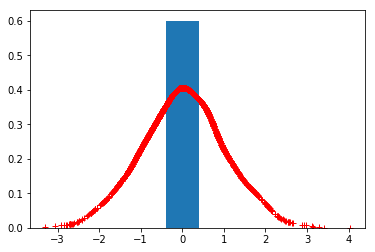

In [9]:
plt.figure()
plt.plot(testValues,est, 'r+')
plt.bar(zeros, height = 0.6, width=0.8)

### Try the same ER model but with a non-Gaussian edge  

In [10]:
n = 100
p = 0.4 ## prob of edge existing 
np.random.seed(1)
G2 = er_np(n=n, p=p)
zeros2 = G2[G2 ==0]

In [11]:
for index, x in np.ndenumerate(G2):
    if x == 1:
        G2[index] = np.random.exponential(4) ##just use exponential with lamba = 1/4
print(G2)

[[ 0.          5.50533316  0.         ...  0.          0.
   3.24539269]
 [ 1.53074456  0.          0.         ...  0.          0.
   3.86254465]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.0329085 ]
 [16.42502729  0.24583833  0.         ...  0.          3.42523816
   0.        ]]


In [12]:
expoValues = G2[G2 != 0] ##extracting the remaining normals to fit the KDE
trainValues2, testValues2 = np.split(expoValues, 2, axis = 0) 



In [13]:
kernel2 = KernelDensity(bandwidth=0.2,  kernel = 'tophat')
trainValues2 = trainValues2.reshape(-1, 1)
output = kernel2.fit(trainValues2)


ValueError: x and y must have same first dimension, but have shapes (1973,) and (1,)

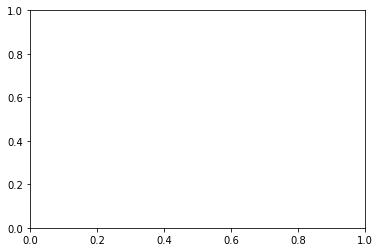

In [14]:
plt.figure()
plt.plot(testValues2,output, 'r+')
#plt.bar(zeros, height = 0.6, width=0.8)

### Try ZI-SBM with Gaussian edges

In [15]:
n = [50, 30]
p = [[0.6, 0.2],
     [0.2, 0.1]]

np.random.seed(1)
G3 = sbm(n=n, p=p)

### Change block edges with different Gaussian. Only changed 2 blocks for trial

In [23]:
for index, x in np.ndenumerate(G3[:50,:50]):
    if x == 1:
        G3[index] = np.random.normal(100,3) 
        


In [24]:
for index, x in np.ndenumerate(G3[:50,50:]):
    if x == 1:
        G3[index] = np.random.normal(200,5) 


### Calc no-edge prob and extract number of zeros

In [25]:
prob1 = ((G3[:50,:50] == 0).sum())/(n[0]**2) ##1st sum how many zeros and then to find prob, divide total number of edges
print(prob1) ##correct


G3Block1 = G3[:50,:50]
zeros1 = G3Block1[G3Block1 ==0] ##extracting zeros for plotting purposes
print(zeros1.shape)



prob2 = ((G3[:50,50:] == 0).sum())/(n[0]*n[1]) ##1st sum how many zeros and then to find prob, divide total number of edges
print(prob2) ##correct


G3Block2 = G3[:50,50:]
zeros2 = G3Block2[G3Block2 ==0] 
print(zeros2.shape)

0.3788
(947,)
0.8026666666666666
(1204,)


### Run KDE on the blocks

### First split the data into training and testing

In [26]:
normalValues1 = G3Block1[G3Block1 != 0] ##extracting the remaining normals to fit the KDE
print(normalValues1.shape)

trainValues3, testValues3 = normalValues1[:750], normalValues1[750:]


normalValues2 = G3Block2[G3Block2 != 0] ##extracting the remaining normals to fit the KDE
print(normalValues2.shape)

trainValues4, testValues4 = normalValues2[:100], normalValues2[100:]
testValues4.shape

(1553,)
(296,)


(196,)

In [27]:
kernel3 = stats.gaussian_kde(trainValues3) ##first train the kernel 



est3 = np.zeros(testValues3.shape[0]) ##to store the output of the kernel func
for index, x in np.ndenumerate(testValues3):
    est3[index] = kernel.evaluate(testValues3[index]) ##test the kernel on the testValues 
    
print(est3.shape)

(803,)


In [28]:
kernel4 = stats.gaussian_kde(trainValues4) ##first train the kernel 



est4 = np.zeros(testValues4.shape[0]) ##to store the output of the kernel func
for index, x in np.ndenumerate(testValues4):
    est4[index] = kernel.evaluate(testValues4[index]) ##test the kernel on the testValues 
    
print(est4.shape)

LinAlgError: singular matrix

<BarContainer object of 947 artists>

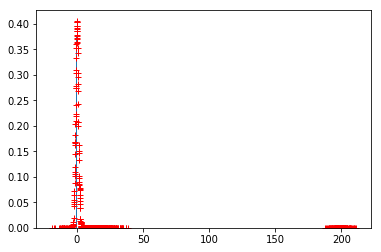

In [29]:
plt.figure()
plt.plot(testValues3,est3, 'r+')
plt.bar(zeros1, height = prob1, width=0.8)